In [1]:
# Eigen Decomposition
# Author: Zhang Su (Teaching Assistant)
# Using python3, numpy, Latex
# 17 June 2020

# Learning Outcome

By the end of this material, you should be able to:

+ Carry out the EVD using Numpy routines.
+ Describe the effect of the eigenvectors and eigenvalues of $A$ has on a vector $x$.
+ Describe the visual effect caused by eigenvalue of $0$.
+ Verify the scaling effect of eigenvalues using Python.

Note: 
1. If you occasionally double clicked a textual cell, the display would change to markdown source code. To reverse, simply click anywhere of that markdown cell,  and then click **Run** in the top manu.
2. Sometimes the notebook may not be responding. That is caused by the failure of jupyter kernel. To repair, try clicking **Kernel** in the top manu, then clicking **Reconnect**. 
3. Section Takeaways summarizes useful tips, e.g., holes of Python to avoid, if any.
4. Section Practice reflect the learning outcomes. You are expected to solve them based on your understanding on the lecture notes alone with the coding skills learned from this demo.

# Table of contents <a name="Table_of_Content"></a>
+ (8.1.1-2) [Introducing Eigenvectors and Eigenvalues](#IEE)
    + [Thinking of Matrix $A$ as a Linear Transformation](#TMLT)
    + (Interest) [Interpreting Eigenvectors and Eigenvalues to Transformation](#IEET)
+ (8.1.4) [Eigen Decomposition](#ED)
    + [Does the magnitude matter?](#DMM)
+ (8.1.5) [Special Cases](#SC)
    + [Having an Eigenvalue as 0](#E0)
    + [Eigenvalues for Triangular Matrices](#ETM)
+ [Takwaways](#Takeaways)
+ [Practice](#Practice)

Today we first recall the linear transformation, to which we then interpret the eigen decomposition. Let's import relevant libraries and encapsulate a helper function for plotting.

In [2]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pylab import *

def draw(A):
# This function plot the figures for input mesh, output mesh, and their correspondence.

    density = 0.5

    x1, x2 = np.mgrid[slice(-1, 1 + density, density),
                     slice(-1, 1 + density, density)]

    all_the_v = np.c_[x1.flatten(), x2.flatten()]
    all_the_b = all_the_v.dot(A.T)


    ax1 = plt.subplot(1, 2, 1)
    ax1.scatter(all_the_v[:,0],all_the_v[:,1])
    ax1.set_xlim([-4.5, 4.5])
    ax1.set_ylim([-4.5, 4.5])
    plt.title("Input Mesh")

    ax2 = plt.subplot(1, 2, 2)
    ax2.scatter(all_the_b[:,0],all_the_b[:,1], color='green')
    ax2.set_xlim([-4.5, 4.5])
    ax2.set_ylim([-4.5, 4.5])
    plt.title("Output Mesh")

    fig = plt.figure()
    toPlot = zip(all_the_v[:,0], all_the_v[:,1], all_the_b[:,0], all_the_b[:,1])
    for tuple in toPlot:
        plt.plot([tuple[0], tuple[2]], [tuple[1], tuple[3]], marker='o')
    xlim([-4.5, 4.5])
    ylim([-4.5, 4.5])
    plt.title("Transformation\n The lines connected the corresponding points\n before and after the transformation.")

    plt.show()

### Introducing Eigenvectors and Eigenvalues<a name="IEE"></a>
[Return to Table of Content](#Table_of_Content)

#### Thinking of Matrix $A$ as a Linear Transformation<a name="TMLT"></a>
[Return to Table of Content](#Table_of_Content)

Let $A=\begin{pmatrix}2 & 1\\
1 & 2
\end{pmatrix}$ be a linear transformation. Given the input mesh (a set of blue points, denoted by `v`), the output mesh (a set of green points, denoted by b) can be yielded. The transformation is written as:

$$
\begin{equation}
A\mathbf{v} = \mathbf{b}
\end{equation}
$$

The points of the input mesh are warped diagonally by the transformation, as shown in the figures below. 

**It is worth noting the transformation is somehow skewed.** Metaphorically, the transformation `A` is *not elegent*.

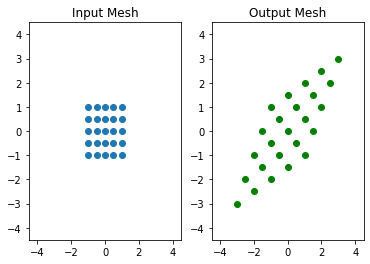

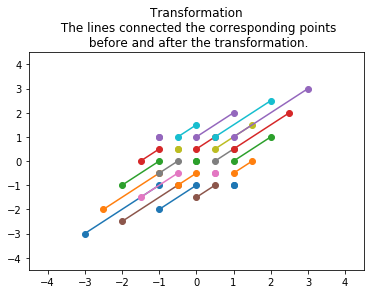

In [3]:
A = np.array([[2, 1],
             [1, 2]], dtype=float)

draw(A)

#### Interpreting Eigenvectors and Eigenvalues to Transformation<a name="IEET"></a>
[Return to Table of Content](#Table_of_Content)

Now we will see that the eigenvectors and eigenvalues can produce *perfect* transformation, compared to the example above.

To illustrate this amazing phenomena, let us manually craft $A$ by the following considerations<a name="Consideration"></a>.

1. We would like to consistently scale the coordinate of each point by a constant, say, `3`.
2. Since a plane is spanned by any two linearly independent vectors, we have to make sure that the constant `3` has a multiplicity of `2`, corresponding to two linearly independent vectors, respectively.

Therefore, let the eigenvalue be formulated as a diagonal matrix $D=\begin{pmatrix}3, 0\\
0, 3
\end{pmatrix}$, and the coresponding eigenvectors be formulated as $U=\begin{pmatrix}1, 2\\
2, 1
\end{pmatrix}$. Note that $U$ can have any values so long as the two column vectors are linearly independent.

The transformation $A$ is obtained as:

$$
\begin{equation}
A = UDU^{-1} \tag{1}
\end{equation}
$$

Let's implement these and plot the figures!

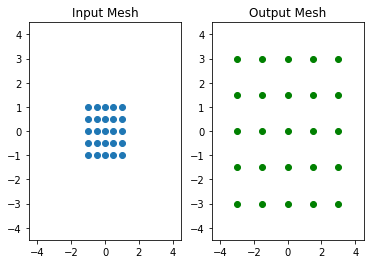

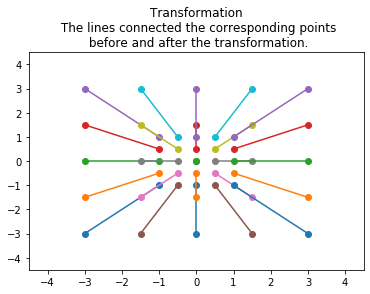

In [4]:
D = np.array([3., 3.])
U = np.array([[1,2],
             [2,1]], dtype=float)

# Eq. 1
A = U.dot(np.diag(D)).dot(la.inv(U))

draw(A)

This time `A` produced a very beautiful transformation, the coordinate of every point is scaled by `3`.

Now let's get back to the first example where $A=\begin{pmatrix}2 & 1\\
1 & 2
\end{pmatrix}$, and analysis it again.

In [5]:
A = np.array([[2, 1],
             [1, 2]], dtype=float)

D, U = la.eig(A)
print("The eigenvalues are \n", D.round(4))
print("The eigenvectors are \n", U)

The eigenvalues are 
 [3. 1.]
The eigenvectors are 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]




First, through the eigen decomposition `la.eig(A)`, we will find that the eigenvalues $D=\begin{pmatrix}3 & 0\\
0 & 1
\end{pmatrix}$, and the eigenvectors $U=\left(\begin{array}{rr}
0.7071 & -0.7071\\
0.7071 & 0.7071
\end{array}\right)$.

Since Python kindly normalized the column vectors of $U$ for us, we can simply ignore the long decimal and safely scale it to something we human like, e.g., $U=\left(\begin{array}{rr}
1 & -1\\
1 & 1
\end{array}\right)$.

Following the [considerations](#Consideration) we made just now,

+ an eigenvalue of 3, corresponding to the eigenspace $\begin{pmatrix}1\\1\end{pmatrix}$, and
+ an eigenvalue of 1, corresponding to the eigenspace $\begin{pmatrix}-1\\1\end{pmatrix}$,

are obtained, where

+ the eigenspace $\begin{pmatrix}1\\1\end{pmatrix}$ is the anti-diagonal, and
+ the eigenspacec $\begin{pmatrix}-1\\1\end{pmatrix}$ is the diagonal.

As highlighted below using in the two longest blue and red line, respectively.

![](img/eigen_space.png)

As expected, all the points on the long blue line are scaled by `3`, while all the points on the long red line are scale by `1`, i.e., remain static.

**In sum, an eigenvalue `d` will scale anything in the eigenspace by a factor of `d`.**

Finally, let's see a more general example. We verify the scale effect by the following steps.

1. Step one, decompose `A` obtaining the eigenvalues and the corresponding eigenvectors.
2. Step two, reconstruct `A` by $A = UDU^{-1}$.
3. Step three, manually create a vector `v` **within the eigenspace by linearly combining the eigenvectors**.
4. Step four, check the scale by $Av/v$, where $/$ is the entry-wise dividing.

**An eigenvalue `d` will scale anything in the eigenspace by a factor of `d`.** $A$ has eigenvalues 2 and 9, the scaling effect is verified by the example below.

In [6]:
a, b = 2, 3.4 # Specify any coefficients

A = np.array([[4, -1, 6],
             [2, 1, 6],
             [2, -1, 8]], dtype=float)

# Step one
D, U = la.eig(A)

print("The eigenvalues are \n", D.round(4))
print("The eigenvectors are \n", U)


# Step two
A_reconstructed = U.dot(np.diag(D)).dot(la.inv(U)).round(4)
print("The reconstructed A is \n", A_reconstructed)

# Step three
any_vector_in_eigenspace_1 = a*U[:,1] + b*U[:,2]
any_vector_in_eigenspace_2 = a*U[:,0]

# Step four
check_grow_1 = (A.dot(any_vector_in_eigenspace_1) / any_vector_in_eigenspace_1).round(4)
check_grow_2 = (A.dot(any_vector_in_eigenspace_2) / any_vector_in_eigenspace_2).round(4)

print("The entry-wise grow factor is \n", check_grow_1)
print("The entry-wise grow factor is \n", check_grow_2)

The eigenvalues are 
 [9. 2. 2.]
The eigenvectors are 
 [[-0.57735027 -0.61218866  0.32054627]
 [-0.57735027 -0.78734979 -0.91121623]
 [-0.57735027  0.07283792 -0.25871813]]
The reconstructed A is 
 [[ 4. -1.  6.]
 [ 2.  1.  6.]
 [ 2. -1.  8.]]
The entry-wise grow factor is 
 [2. 2. 2.]
The entry-wise grow factor is 
 [9. 9. 9.]


### Eigen Decomposition<a name="ED"></a>
[Return to Table of Content](#Table_of_Content)

Given an $n\times n$ matrix $A$, the eigen decomposition seeks to obtain the eigenvalues $\Lambda$ and the corresponding eigenvectors $Q$, so that:


\begin{equation}
A=Q\Lambda Q^{-1} \tag{1}
\end{equation}

where $\Lambda$ is an $n\times n$ diagonal matrix, and $Q$ is an $n\times n$ matrix. 

In the example below, we first carry out the eigen decomposition, then we reconstruct $A$ following Eq. (1), and finally, we examine whether

$$
AQ=Q\Lambda. \tag{2}
$$

In [7]:
A = np.array([[1,2],
             [3,4]], dtype=float)
Lambda_diag, Q = la.eig(A)
Lambda = np.diag(Lambda_diag)

A_reconstructed = Q.dot(Lambda).dot(la.inv(Q))


print("The eigenvalues are:\n", Lambda)
print("The eigenvectors are:\n", Q)
print("Oh my heck, is Q normalized?", np.allclose(np.diag(Q.T.dot(Q)), np.array([1,1])))
print("\n")
print("The original A is:\n", A)
print("The reconstructed A is:\n", A_reconstructed)
print("\n")
print("Does AQ equal QLambda?", np.allclose(A.dot(Q), (Q).dot(Lambda)))

The eigenvalues are:
 [[-0.37228132  0.        ]
 [ 0.          5.37228132]]
The eigenvectors are:
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
Oh my heck, is Q normalized? True


The original A is:
 [[1. 2.]
 [3. 4.]]
The reconstructed A is:
 [[1. 2.]
 [3. 4.]]


Does AQ equal QLambda? True


#### Does the magnitude of $Q$ matters?<a name="DMM"></a>
[Return to Table of Content](#Table_of_Content)

In the example above, you may have seen that $Q$ is automatically normalized (as we have verified, the diagonal entries of $Q^TQ$ are all ones. You may wonder that, since $Q$ is normalized, while $\Lambda$ is not, maybe $AQ=Q\Lambda$ does not hold anymore. Let's examine.

To this end, let us "reverse" the normalization. The "reverse" means that for each column of $Q$, we multiply it by a distinct scalar. We do not care what exactly the scalrs should be, let's try some arbitrary values, say, 1.33 and 4.953.

In [8]:
Q_denormalized = np.c_[1.33*Q[:,0], 4.953*Q[:,1]]
print("Does AQ still equal QLambda?", np.allclose(A.dot(Q_denormalized), (Q_denormalized).dot(Lambda)))

Does AQ still equal QLambda? True


We see that the "magnitude" of eigenvectors does not change the equality! That can be understood by noting that the magnitude of the eigenvectors in $Q$ gets cancelled in the decomposition by the presence of $Q^{-1}$. 

**This implies that the decomposition is not unique! No matter how long the eigenvectors are, no matter they are pointing to positive or negative direction, we can always reconstruct $A$ by Eq. (1)!** This is understandable, because the eigenspace can be defined regardless of the magnitude of axes, right?

Cheers, the normalization step is not required when we are calculating by our bare hands :) Doing so is just a convention for computational tools like Matlab and Python.

### Special Cases<a name="SC"></a>
[Return to Table of Content](#Table_of_Content)

#### Having an Eigenvalue as 0<a name="E0"></a>
[Return to Table of Content](#Table_of_Content)

What if an eigenvalue of zero (as shown below)?

Answer: you may try to analysis following the previous examples on your own! The visualization below may help you.

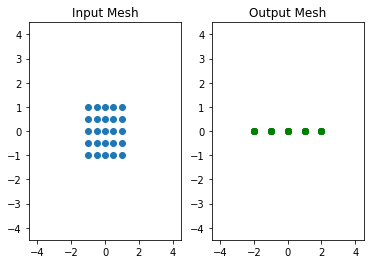

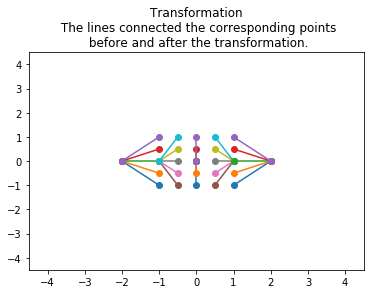

In [9]:
D = np.array([2., 0.])
U = np.array([[1,0],
             [0,1]], dtype=float)

A = U.dot(np.diag(D)).dot(la.inv(U))

draw(A)

#### Eigenvalues for Triangular Matrices<a name="ETM"></a>
[Return to Table of Content](#Table_of_Content)

Let us verify this property. Given an upper triangular matrix $A$ with arbitrary values, let us see if its eigenvalues are identical to the diagonal entries.

In [10]:
D = np.array([2., 0.])
A = np.array([[1,0,3.3, 4.446],
             [0,2, 1, 0],
             [0,0,3,2.222],
             [0,0,0,4]], dtype=float)

Lambda_diag, Q = la.eig(A)
Lambda = np.diag(Lambda_diag)
print("A = \n", A)
print("The eigenvalues are:", Lambda_diag)
print("Equaling to diagonal entries?", np.allclose(Lambda_diag, np.diag(A)))


A = 
 [[1.    0.    3.3   4.446]
 [0.    2.    1.    0.   ]
 [0.    0.    3.    2.222]
 [0.    0.    0.    4.   ]]
The eigenvalues are: [1. 2. 3. 4.]
Equaling to diagonal entries? True


### Takeaways<a name="Takeaways"></a>
[Return to Table of Content](#Table_of_Content)

1. An eigenvalue `d` will scale anything in the eigenspace by a factor of `d`.
2. Watch this [gorgeous video](https://www.youtube.com/watch?v=PFDu9oVAE-g&t=1s) for better comprehension on eigenvectors and eigenvalues, intuitively.
3. `numpy.linalg.eig()` outputs eigenvalues in the form of an array for space saving. Depending on your purpose, you may further convert the array to a diagonal matrix using `numpy.diag()`.
4. `numpy.linalg.eig()` outputs eigenvectors in a matrix form, together with the corresponding eigenvalues. The eigenvector matrix is normalized.
5. Similar to 4, we have seen that the Q factor from `numpy.linalg.qr()` is normalized, later you will also see that the U and V factors from `numpy.linalg.svd()` are also normalized. Thanks to the convenience provided by computational tools like Matlab and Python.

### Practice<a name="Practice"></a>
[Return to Table of Content](#Table_of_Content)

1. Randomly generate a square matrix $A$ at any size: 
    + Carry out EVD on $A$ obtaining $A=PDP^{-1}$, and then encapsulate your code of EVD in the definition of `P, D = my_evd(A)`. 
    + Arbitrary scale each column of $P$ by a distinct scalar, verify that if $A=PDP^{-1}$ can still reconstruct $A$ using the new $P$.
    + Arbitrary scale each column of $D$ by a distinct scalar, verify that if $A=PDP^{-1}$ can still reconstruct $A$ using the new $D$.
2. (Bonus) For any EVD $A=PDP^{-1}$, how to rank the importance of eigenvectors?
    + Can we follow the ranking of eigenvalues?